# Pretrained Networks: Using MobileNet V2

we want to get a classification for the image `tram.jpg`

### Step 1: Read an image

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

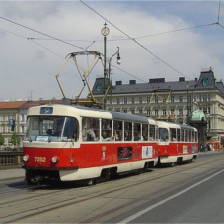

In [2]:
im = image.load_img('./tram.jpeg', target_size=(224, 224))
im

In [3]:
a = image.img_to_array(im)
a = preprocess_input(a)

**Q: inspect the shape and data type of the numpy array and explain what you see**

In [4]:
a.shape

(224, 224, 3)

In [5]:
a.dtype

dtype('float32')

### Step 2: Load MobileNetV2

In [6]:
m = MobileNetV2()

### Step 3: Prediction

In [7]:
from pprint import pprint

# reshape to (1,244,244,3)
a = a.reshape(1, 224, 224, 3)
p = m.predict(a)

# Decodes the prediction of an ImageNet mode
pprint(decode_predictions(p, 10))

[[('n04335435', 'streetcar', 0.9553406),
  ('n04487081', 'trolleybus', 0.010753851),
  ('n03272562', 'electric_locomotive', 0.0026183396),
  ('n03895866', 'passenger_car', 0.0026057998),
  ('n03874293', 'paddlewheel', 0.00039274365),
  ('n02917067', 'bullet_train', 0.00035161828),
  ('n01755581', 'diamondback', 0.00028048776),
  ('n03947888', 'pirate', 0.0001823874),
  ('n03976657', 'pole', 0.00016886267),
  ('n03133878', 'Crock_Pot', 0.00016484181)]]


### Step 4: Intermediate output
We can visualize the intermediate output of each CNN layer, too!

In [8]:
from tensorflow.keras import Model

intermediate_layer_model = Model(inputs=m.input,
                                 outputs=[
                                     m.get_layer(index=2).output,
                                     m.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate_layer_model.predict(a)
cnn2.shape, cnn100.shape

((1, 112, 112, 32), (1, 14, 14, 576))

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])

plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])

plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 0])

### Step 5: Try out another image
Make a prediction for your own image.
Use Pillow to cut out a square shape

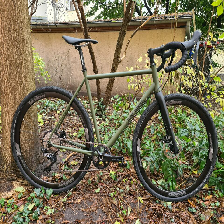

In [10]:
#load the image from the path
im = image.load_img('./bike-002.jpeg', target_size=(224, 224))
im

In [11]:
#print the size of the image 

In [12]:
# resize the image to 224 by 224

# print the image

In [13]:
# convert image to an array
a = image.img_to_array(im)
a = preprocess_input(a)

In [14]:
# preprocess the input
m = MobileNetV2()

# reshape the array to (1, 224, 224, 3)
from pprint import pprint

# reshape to (1,244,244,3)
a = a.reshape(1, 224, 224, 3)
p = m.predict(a)

In [15]:
# predict
pred = decode_predictions(p, 5)
pprint(pred)


# print the top 5 predictions

[[('n02835271', 'bicycle-built-for-two', 0.39024565),
  ('n04482393', 'tricycle', 0.21250477),
  ('n03792782', 'mountain_bike', 0.15468627),
  ('n04509417', 'unicycle', 0.029713815),
  ('n03891251', 'park_bench', 0.014902388)]]


### Step 5: Try out InceptionV3
Try out the inceptionv3 network on the tram image

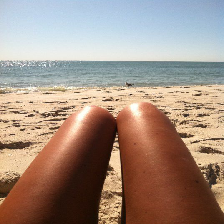

In [16]:
#import the inceptionv3 network
# check https://keras.io/api/applications/inceptionv3/

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = './legs-or-hot-dogs1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [17]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n09428293', 'seashore', 0.39179492), ('n03710637', 'maillot', 0.13105777), ('n09421951', 'sandbar', 0.12516417)]


In [18]:
!python --version

Python 3.8.10


In [19]:
!pip freeze | grep tensor

tensorboard-data-server==0.6.1
tensorboard-plugin-wit==1.8.0
tensorflow-io-gcs-filesystem==0.22.0


In [20]:
# instantiates the Inception v3 architecture


In [21]:
# convert image to an array


# preprocess the input


# reshape the array to (1, 224, 224, 3)


# predict


# print the top 5 predictions
